# Prostate Data

Prostate dataset comes from the text book "The Elements of Statistical Learning". The dataset description can be found here [https://hastie.su.domains/ElemStatLearn/data.html](https://hastie.su.domains/ElemStatLearn/data.html)

In [1]:
dat <- read.csv("https://hastie.su.domains/ElemStatLearn/datasets/prostate.data", sep="\t")[, -1]

In [2]:
head(dat)

lcavol     lweight  age lbph      svi lcp       gleason pgg45 lpsa      
1 -0.5798185 2.769459 50  -1.386294 0   -1.386294 6        0    -0.4307829
2 -0.9942523 3.319626 58  -1.386294 0   -1.386294 6        0    -0.1625189
3 -0.5108256 2.691243 74  -1.386294 0   -1.386294 7       20    -0.1625189
4 -1.2039728 3.282789 58  -1.386294 0   -1.386294 6        0    -0.1625189
5  0.7514161 3.432373 62  -1.386294 0   -1.386294 6        0     0.3715636
6 -1.0498221 3.228826 50  -1.386294 0   -1.386294 6        0     0.7654678
  train
1 TRUE 
2 TRUE 
3 TRUE 
4 TRUE 
5 TRUE 
6 TRUE

In [3]:
dat1 <- scale(dat[,1:8], TRUE, TRUE); dat1 <- data.frame(cbind(dat1, lpsa=dat$lpsa))

# Correlation

In [4]:
pairs(dat1)

## Fancy plots


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




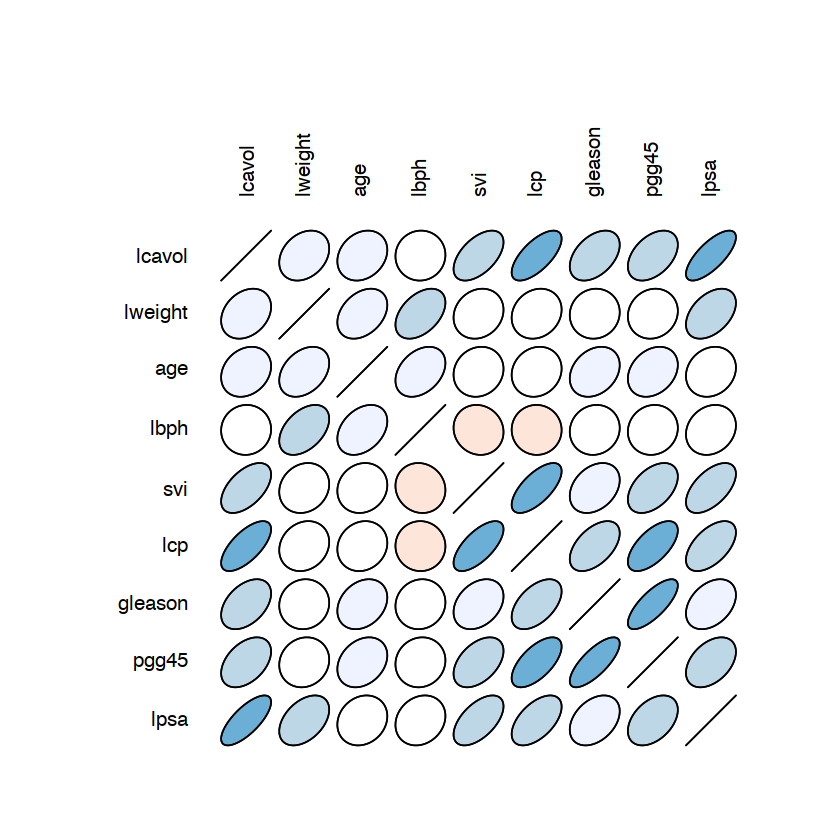

In [5]:
  library(ellipse); library(lattice)
  cor <- cor(dat1, use="pairwise",method="pearson")
  colors <- c("#A50F15","#DE2D26","#FB6A4A","#FCAE91","#FEE5D9","white",
            "#EFF3FF","#BDD7E7","#6BAED6","#3182BD","#08519C")   
  plotcorr(cor, col=colors[5*cor +6])

# Histogram

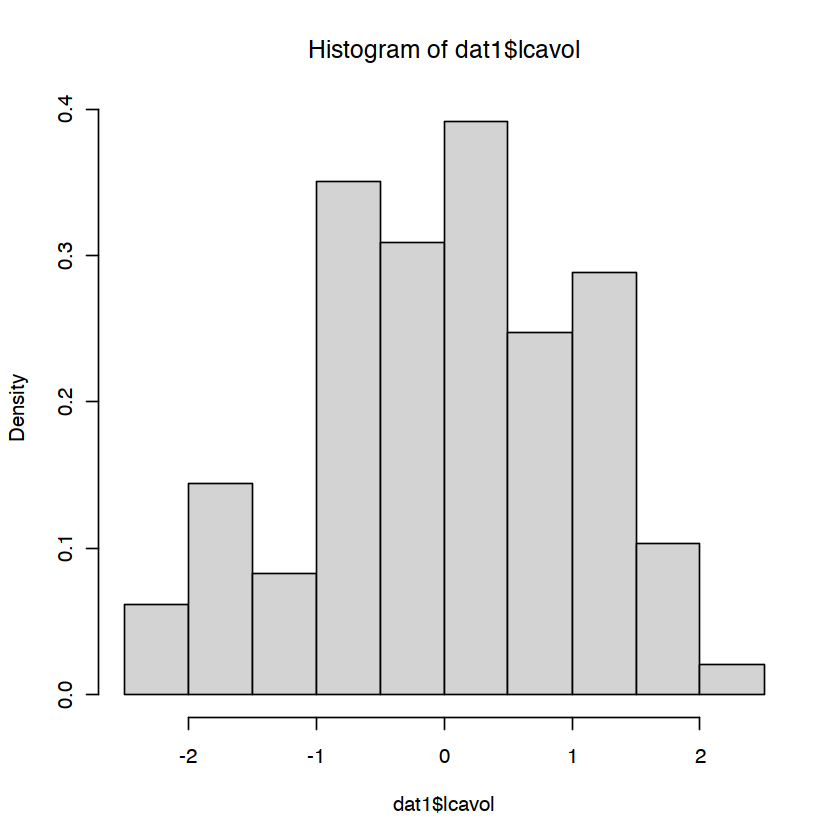

In [6]:
hist(dat1$lcavol, prob=T)

## Fancy

In [7]:
hist(dat1$lcavol, prob=T,xlab=" ", main="", ylim=)
lines(density(dat1$lcavol,na.rm=T))
rug(jitter(dat1$lcavol))

# Boxplot

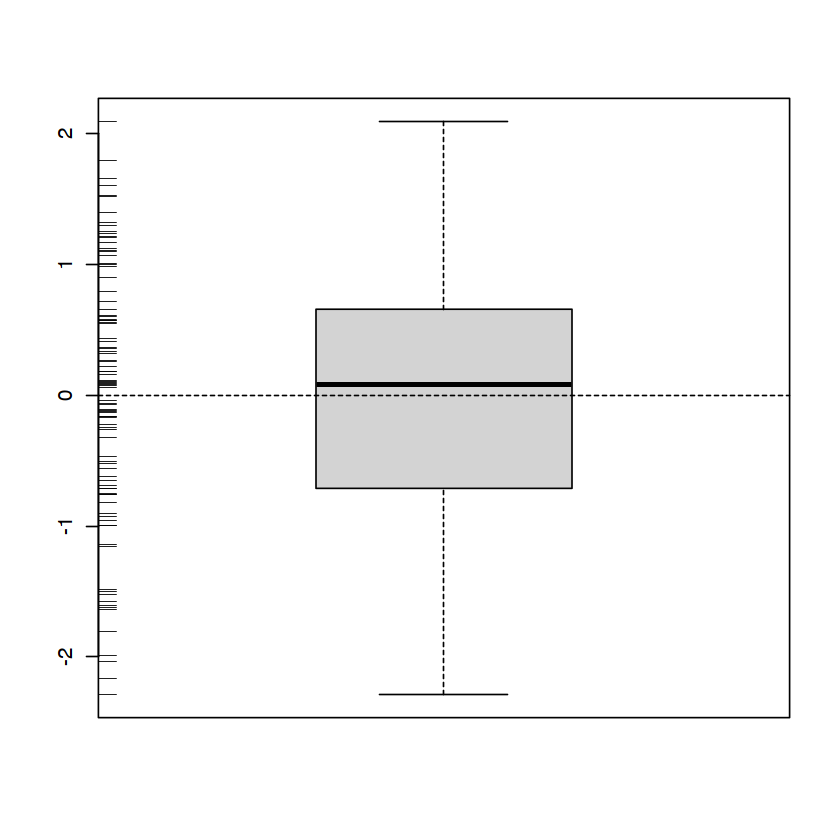

In [8]:
boxplot(dat1$lcavol, boxwes=0.15, ylab="")
rug(jitter(dat1$lcavol),side=2)
abline(h=mean(dat1$lcavol,na.rm=T),lty=2)

## Fancy

By categorical variables

In [9]:
bwplot(lcavol~as.factor(gleason), data=dat, ylab="", xlab="")

By continuous variables

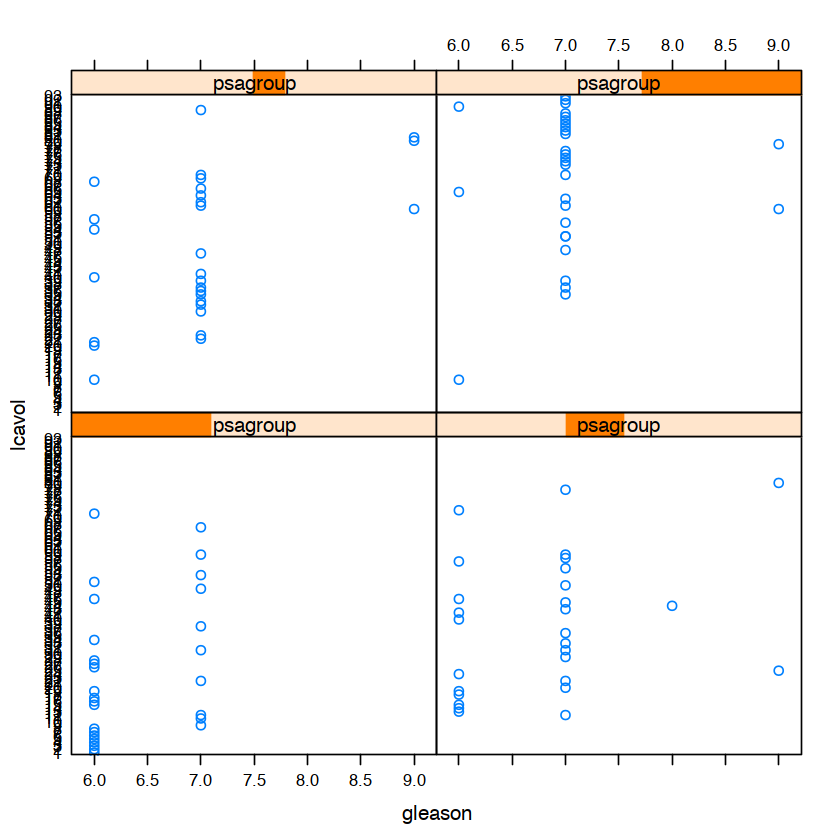

In [10]:
psagroup <- equal.count(na.omit(dat1$lpsa), number=4, overlap=1/5)
stripplot( lcavol~ gleason|psagroup, data=dat)

# Star plots

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2

Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”

Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




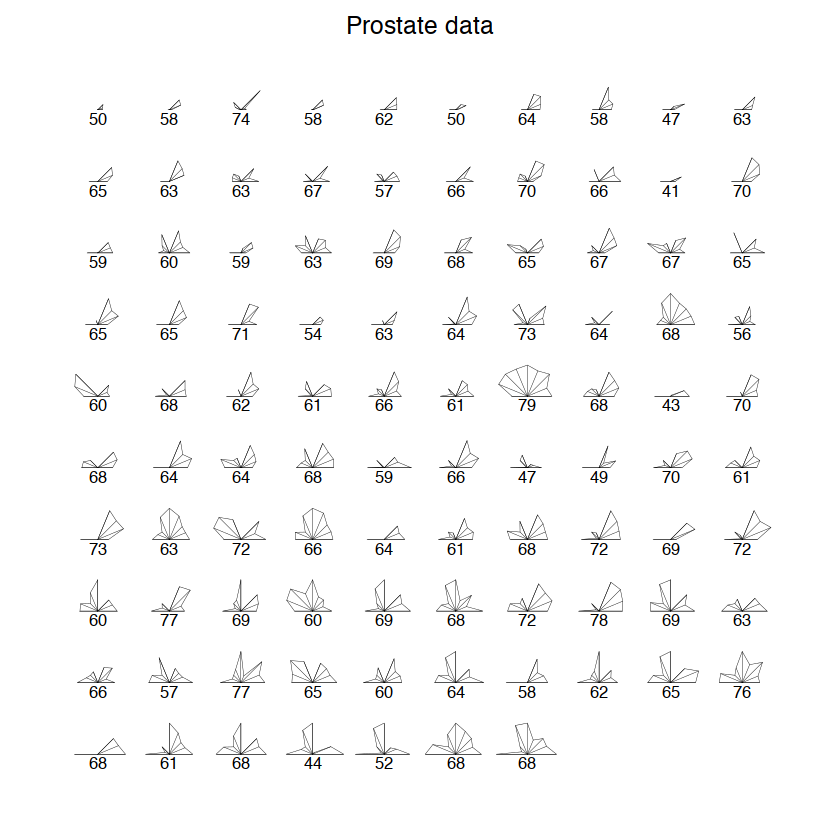

In [11]:
library(Hmisc)
stars(scale(dat[,-10]), labels=round(dat[,3],digits=1),full=FALSE, main="Prostate data")

Explanation of star plots: [https://www.itl.nist.gov/div898/handbook/eda/section3/starplot.htm#:~:text=The%20star%20plot%20(Chambers%201983,each%20star%20representing%20one%20observation.](https://www.itl.nist.gov/div898/handbook/eda/section3/starplot.htm#:~:text=The%20star%20plot%20(Chambers%201983,each%20star%20representing%20one%20observation.)

# Profile

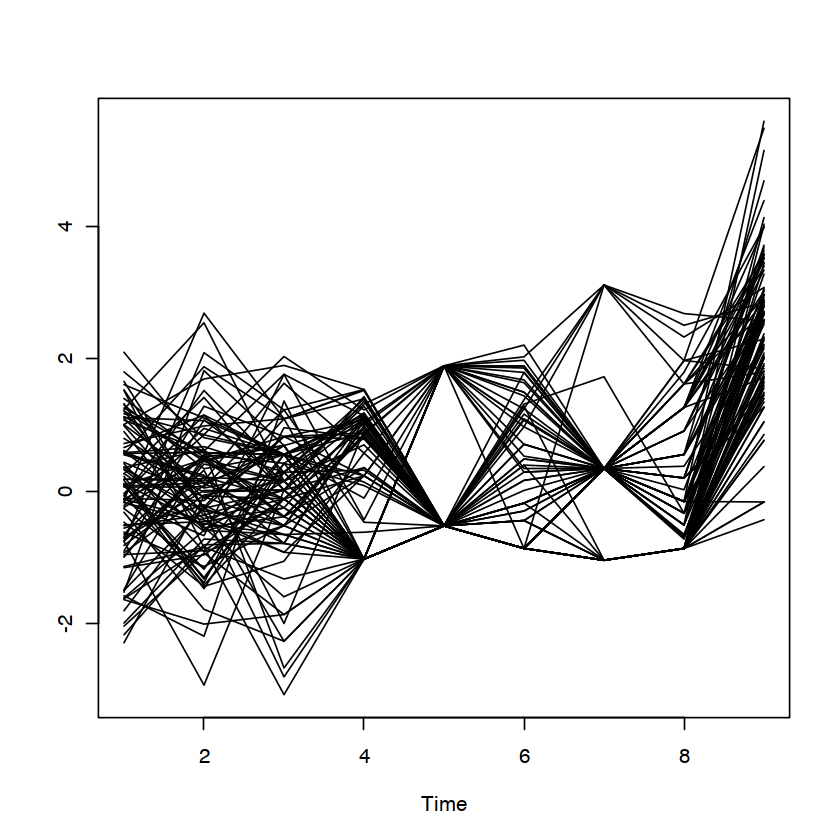

In [12]:
ts.plot(t(dat1[,-10]))

# Car

In [13]:
x<- as.matrix(mtcars)
hv <- heatmap(x, scale="column", margin=c(5,10), xlab="specification variables",ylab="Car Models", main="Heatmap for MTcars data")

## Chernoff faces

In [14]:
library(TeachingDemos)
faces(x)


Attaching package: ‘TeachingDemos’


The following objects are masked from ‘package:Hmisc’:

    cnvrt.coords, subplot




Generic explanation of Chernoff faces at [https://en.wikipedia.org/wiki/Chernoff_face](https://en.wikipedia.org/wiki/Chernoff_face)


For this dataset

    + mpg-height of face
    + cyl-width of face
    + disp-shape of face, 
    + hp-height of mouth
    + drat-width of mouth
    + wt-curve of smile
    + qsec-height of eyes, 
    + vs-width of eyes
    + am-height of hair
    + gear-width of hair
    + carb-styling of hair

# ggplot2

In [15]:
library(tidyverse)

Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘hms’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ purrr::flatten()   masks jsonlite::flatten()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::src()       masks Hmisc::src()
✖ dplyr::summarize() masks Hmisc::summarize()



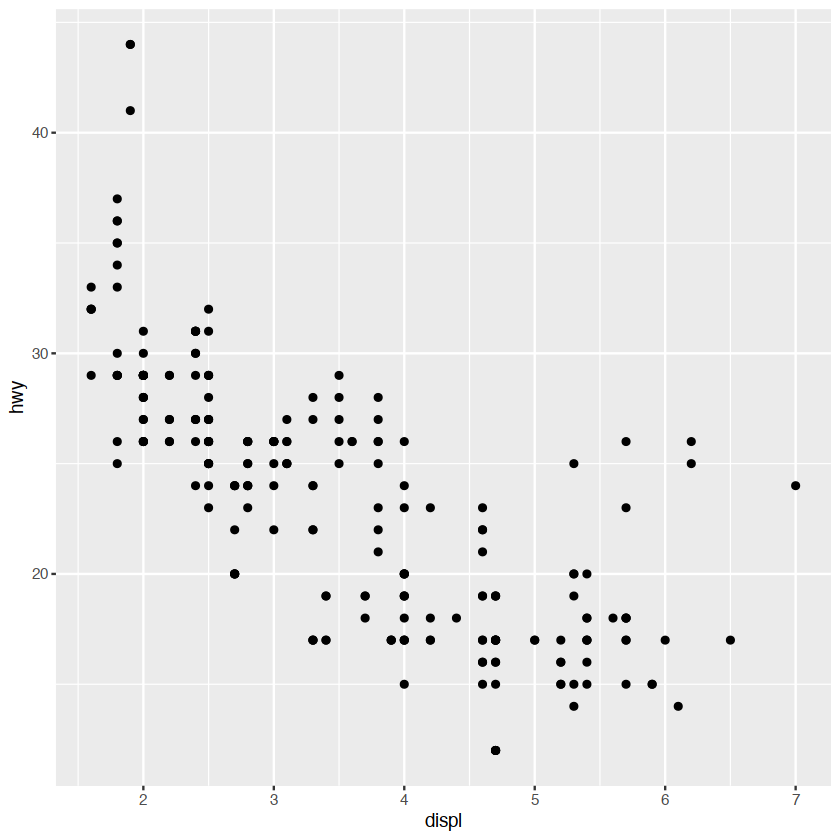

In [16]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

In [17]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=class))

Warning message:
“Using size for a discrete variable is not advised.”


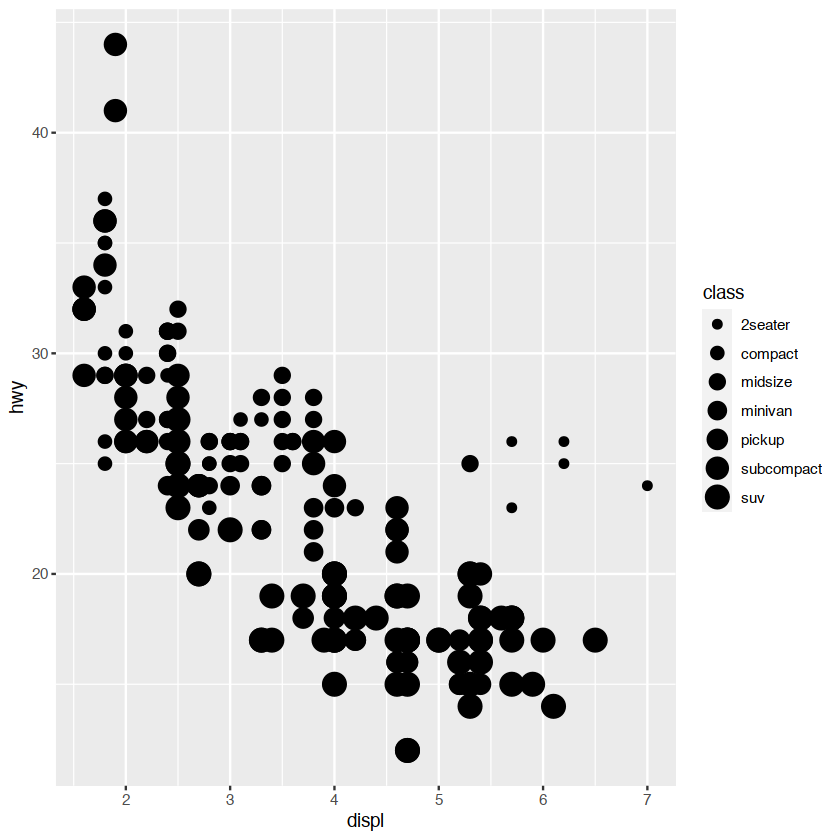

In [18]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = class))

Warning message:
“Using alpha for a discrete variable is not advised.”


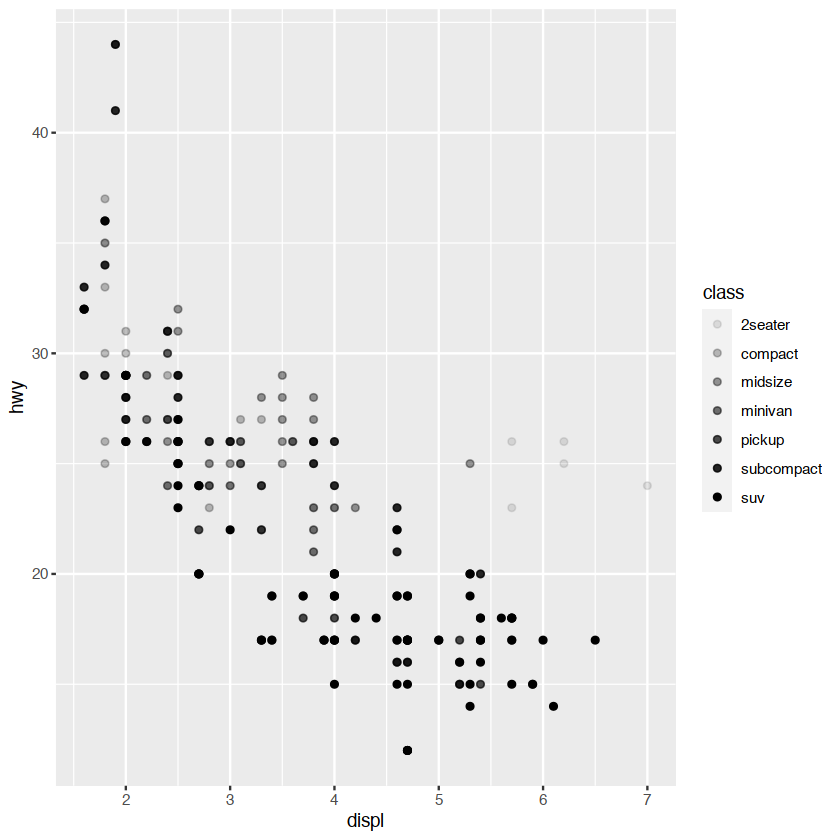

In [19]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


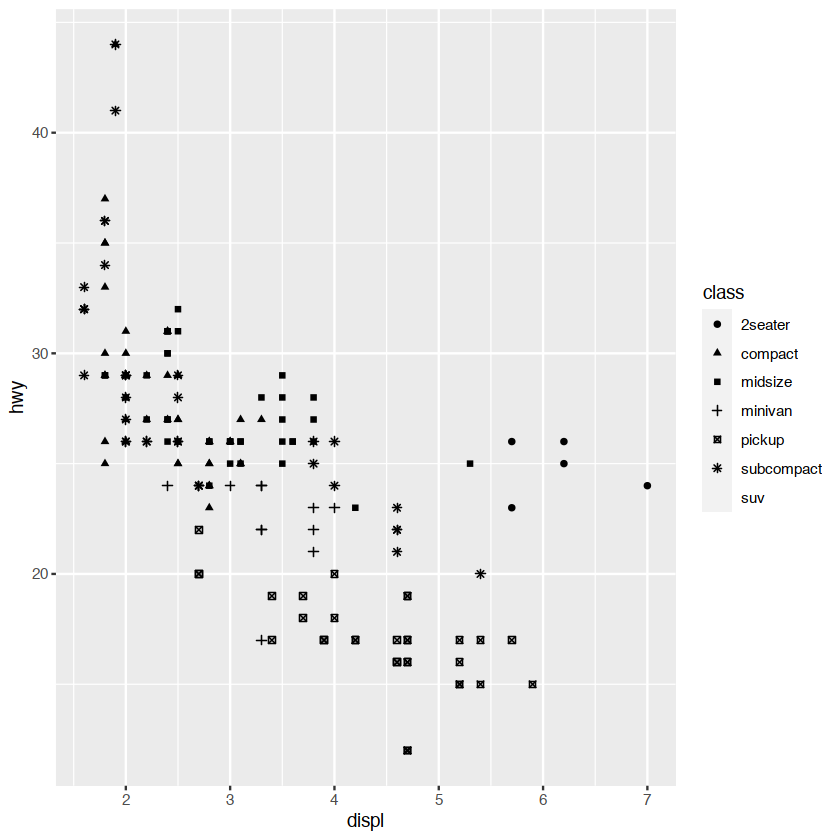

In [20]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

In [21]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

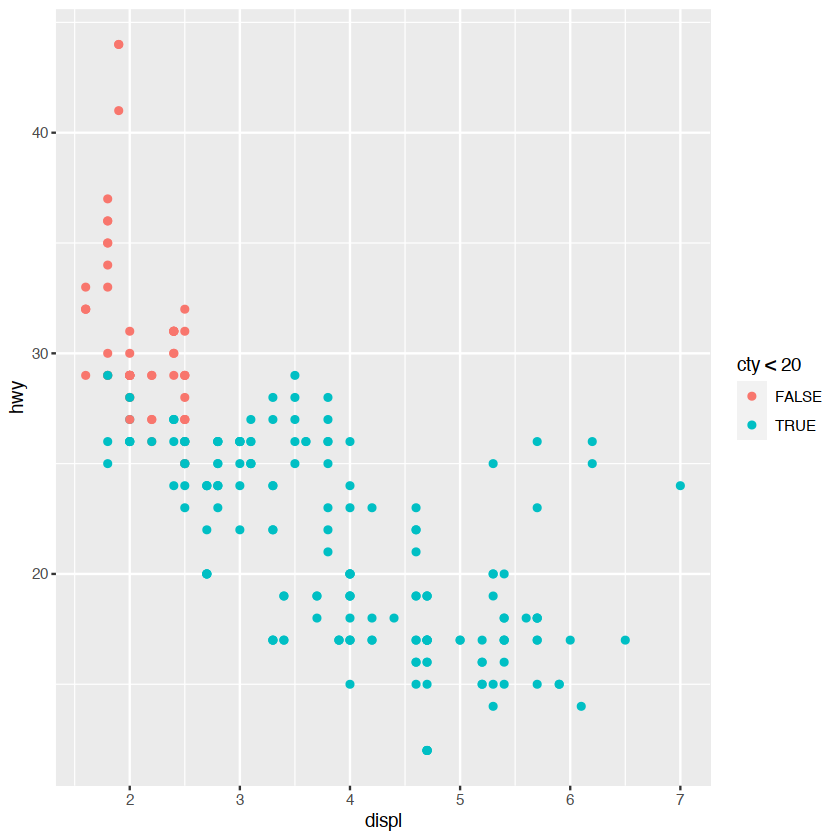

In [22]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=cty<20))

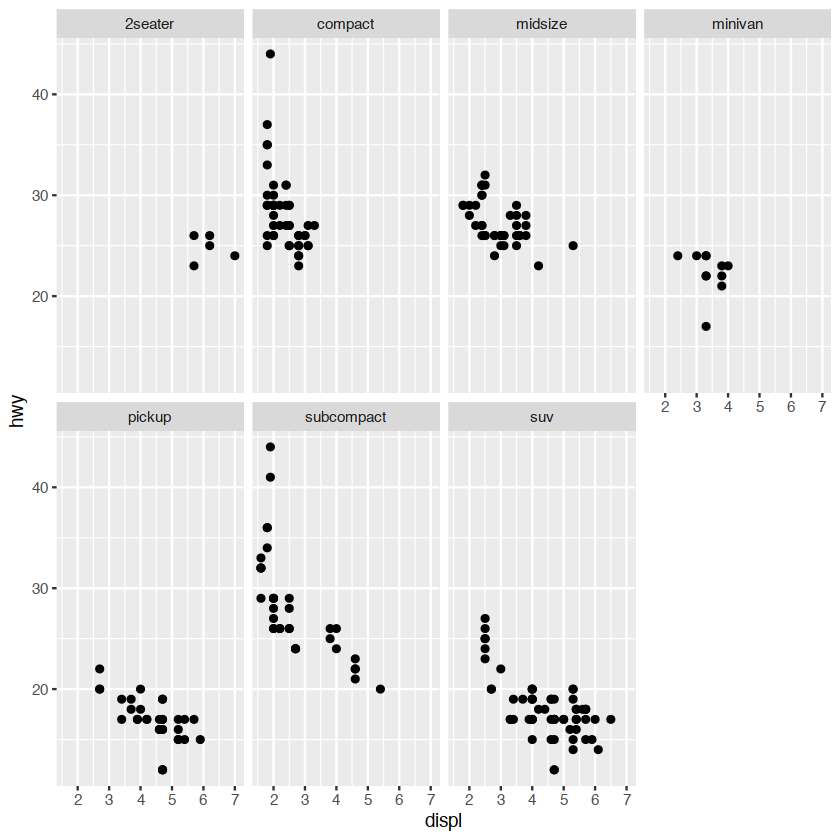

In [23]:
# Facets (split into multiple plots)
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)

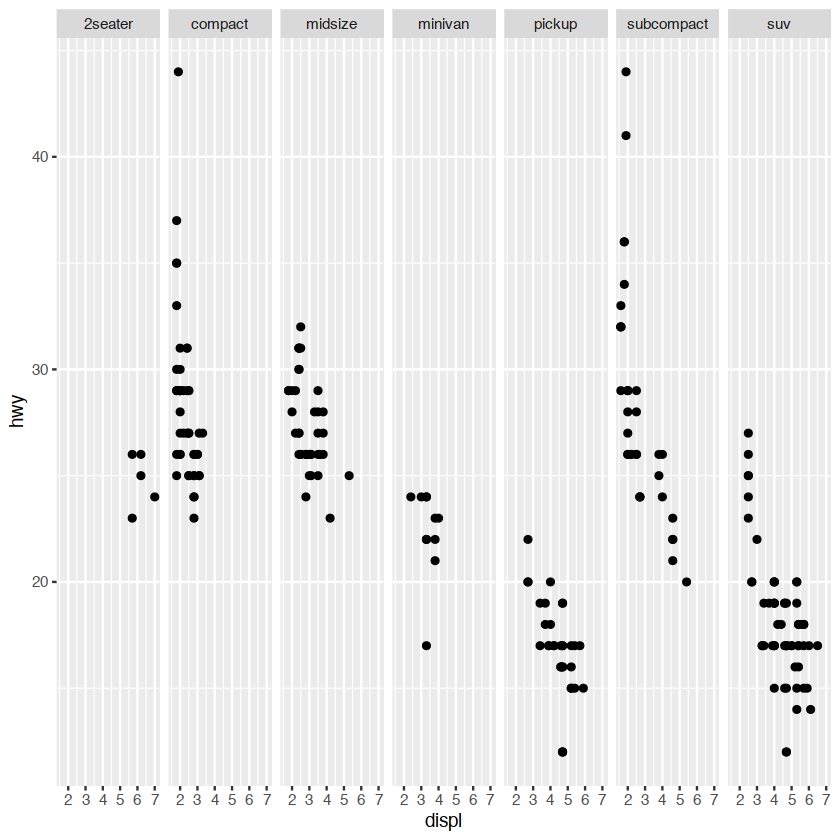

In [24]:
# Or can put them in same row:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(. ~ class)

In [25]:
# or in same column (which is better between this and previous plot?)
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(class~.)

In [26]:
# what if we use a continuous variable for faceting?
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(. ~ cty)

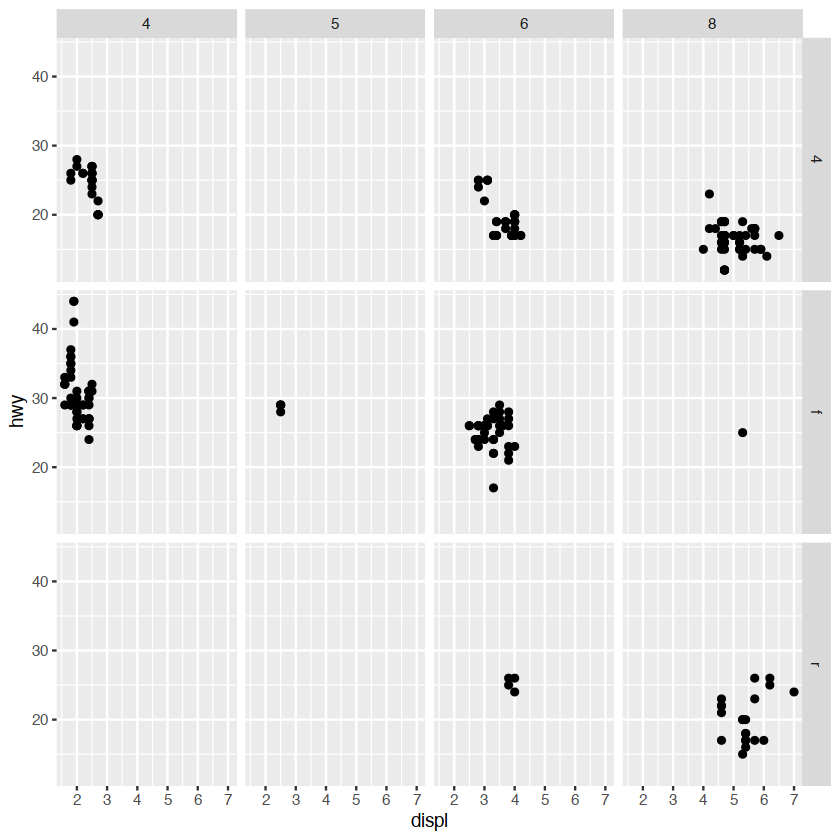

In [27]:
# To use two variables for faceting:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ cyl)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



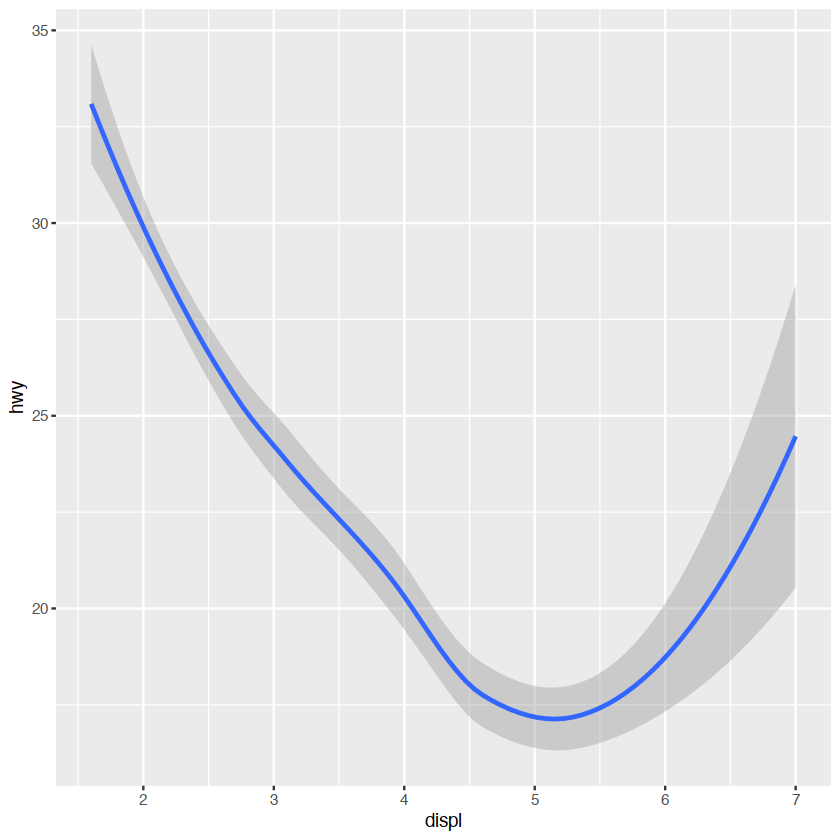

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



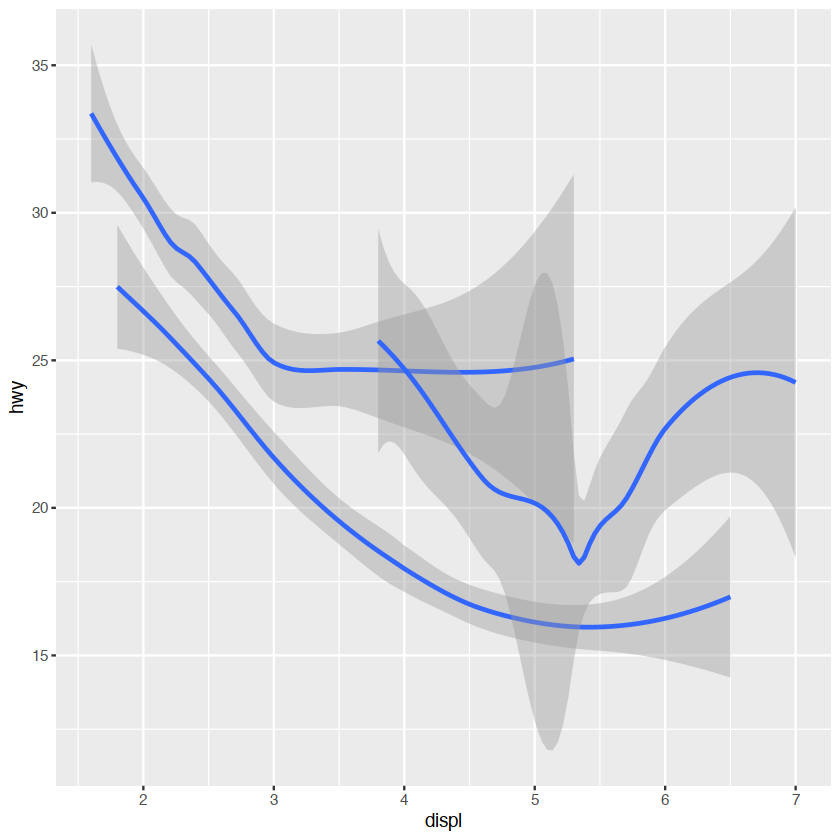

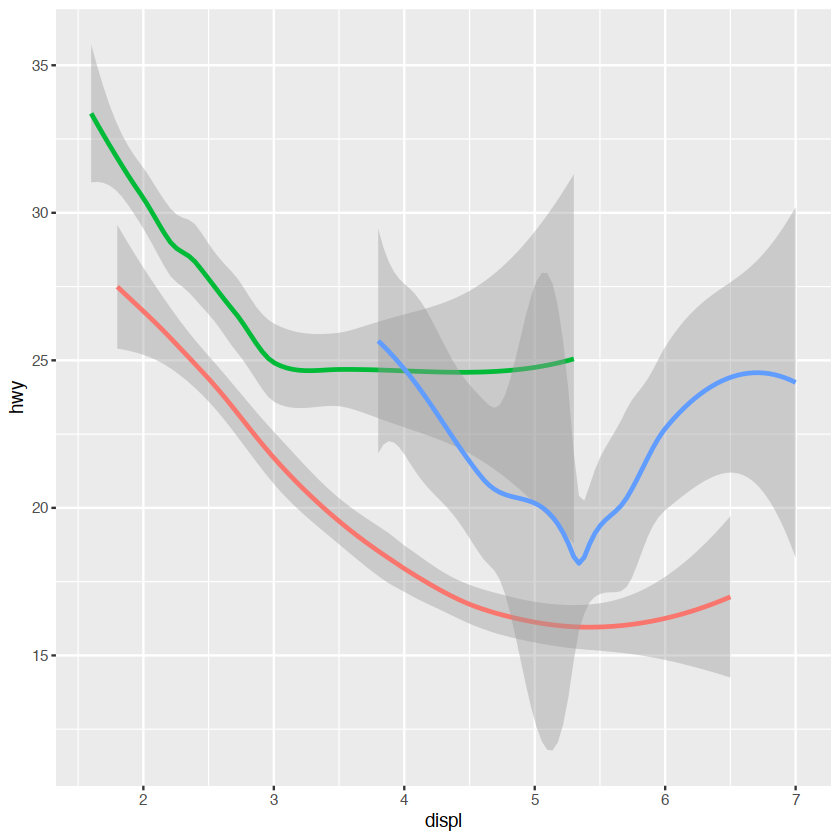

In [28]:
# To add smooth curve:
ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

ggplot(data = mpg) +
  geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))

ggplot(data = mpg) +
  geom_smooth(
    mapping = aes(x = displ, y = hwy, color = drv),
    show.legend = FALSE
  )

#  Plotly

In [29]:
library(plotly)

fig <- plot_ly(data = mpg, x = ~displ, y = ~hwy)

fig


Attaching package: ‘plotly’


The following object is masked from ‘package:TeachingDemos’:

    subplot


The following object is masked from ‘package:Hmisc’:

    subplot


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


No trace type specified:
  Based on info supplied, a 'scatter' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter

No scatter mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode

No trace type specified:
  Based on info supplied, a 'scatter' trace seems appropriate.
  Read more about this trace type -> https://plotly.com/r/reference/#scatter

No scatter mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plotly.com/r/reference/#scatter-mode



HTML widgets cannot be represented in plain text (need html)